In [1]:
# Capstone 3 SaaS Sales Analysis - Enhancing SaaS Revenue through Data-Driven Sales and Customer Analytics

# Main Objective
# To identify and optimize factors that influence revenue in SaaS companies by analyzing sales data and customer behavior.

In [2]:
# Specific Objectives

# 1. Analyze customer purchasing patterns to understand which products or services are most in demand, purchase frequency, and customer behavior over time.
# 2. Segment customers based on characteristics and value to identify distinct customer groups for targeted strategies.
# 3. Evaluate sales performance by category to determine each segment’s contribution to overall revenue.
# 4. Identify opportunities to increase revenue through upselling/cross-selling, targeting potential segments, and reducing churn among high-value customers.
# 5. Provide actionable, data-driven business recommendations for sales, marketing, finance, product teams, and management.

In [3]:
# Library and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistical analysis and preprocessing
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [4]:
# Load data
df = pd.read_csv('SaaS-Sales.csv')
df.head(10)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694
6,7,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.2800,4,0.00,1.9656
7,8,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
8,9,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.5040,3,0.20,5.7825
9,10,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,OneView,71J8P9Z1P0,114.9000,5,0.00,34.4700


In [5]:
# General Dataset Information
df.info()

# Initial Descriptive Statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9.994000e+03,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,NaN,793,48,262,3,12,99,NaN,10,3,14,9994,NaN,NaN,NaN,NaN
top,NaN,EMEA-2023-100111,9/6/2022,NaN,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,NaN,Finance,SMB,ContactMatcher,16GRM07R1K,NaN,NaN,NaN,NaN
freq,NaN,14,38,NaN,37,2001,922,4219,2507,192,NaN,2127,5191,1842,1,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,2.021803e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.771963,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,1.123898e+04,NaN,NaN,NaN,NaN,NaN,NaN,29.719388,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,2.020010e+07,NaN,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,2.021052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1024.000000,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,2.022063e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.000000,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,2.023052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1076.000000,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [6]:
# A. Data Cleansing

# 1. Check for missing values
missing_values = df.isnull().sum()

# Check for empty strings ''
empty_strings = (df == '').sum()

# Check for dash '-'
dash_values = (df == '-').sum()

# Combine the results into one DataFrame
missing_check = pd.DataFrame({
    'Missing (NaN)': missing_values,
    'Empty Strings': empty_strings,
    'Dash Values': dash_values
})

# Display only columns with any non-zero counts
missing_check = missing_check[(missing_check != 0).any(axis=1)]

print("Checking for Missing Values, Empty Strings, and Dash Values:")
print(missing_check)

Checking for Missing Values, Empty Strings, and Dash Values:
Empty DataFrame
Columns: [Missing (NaN), Empty Strings, Dash Values]
Index: []


In [7]:
# Missing value 
df = df.dropna() 

# 2. Check duplicates
print(f"Number of duplicate records: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

Number of duplicate records: 0


In [8]:
# 3. Outlier Detection Using the IQR Method

# a. Select all numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# b. Initialize a dictionary to store outlier counts
outlier_summary = {}

# c. Loop through each numerical column to calculate outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    
    outlier_summary[col] = outlier_count
    
# d. Display the number of outliers per column
for col, count in outlier_summary.items():
    print(f"{col}: {count} outlier(s)")

Row ID: 0 outlier(s)
Date Key: 0 outlier(s)
Customer ID: 0 outlier(s)
Sales: 1167 outlier(s)
Quantity: 170 outlier(s)
Discount: 856 outlier(s)
Profit: 1881 outlier(s)


In [9]:
# B. Feature Engineering
# The feature engineering process is carried out to extract and create new features from raw data, aiming to improve the quality of analysis and strengthen business insights.

In [10]:
# Ensure 'Order Date' column is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# 1. Invoice_Month & Invoice_Year
df['Invoice_Month'] = df['Order Date'].dt.month
df['Invoice_Year'] = df['Order Date'].dt.year

# 2. Invoice_Weekday
df['Invoice_Weekday'] = df['Order Date'].dt.day_name()

# 3. Discount_Applied
df['Discount_Applied'] = df['Discount'].apply(lambda x: 1 if x > 0 else 0)

# 4. Profit_Margin
df['Profit_Margin'] = df['Profit'] / df['Sales']
df['Profit_Margin'] = df['Profit_Margin'].replace([float('inf'), -float('inf')], pd.NA)

# 5. High_Profit_Margin_Flag
mean_margin = df['Profit_Margin'].mean(skipna=True)
df['High_Profit_Margin_Flag'] = df['Profit_Margin'].apply(lambda x: 1 if pd.notna(x) and x > mean_margin else 0)

# 6. Sales_per_Unit
df['Sales_per_Unit'] = df['Sales'] / df['Quantity']
df['Sales_per_Unit'] = df['Sales_per_Unit'].replace([float('inf'), -float('inf')], pd.NA)

# 7. Revenue_Category
df['Revenue_Category'] = pd.qcut(df['Sales'], q=3, labels=['Low', 'Mid', 'High'])

# 8. Customer_Total_Orders
df['Customer_Total_Orders'] = df.groupby('Customer ID')['Order ID'].transform('count')

# 9. Customer_Total_Sales
df['Customer_Total_Sales'] = df.groupby('Customer ID')['Sales'].transform('sum')

# 10. Replace infinite values again
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# 11. Invoice_YearMonth
df['Invoice_YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

# 12. Country_Total_Sales
df['Country_Total_Sales'] = df.groupby('Country')['Sales'].transform('sum')

# 13. Country_Profit
df['Country_Profit'] = df.groupby('Country')['Profit'].transform('sum')

# Check results
print(df.head())

   Row ID          Order ID Order Date  Date Key    Contact Name  \
0       1  EMEA-2022-152156 2022-11-09  20221109     Nathan Bell   
1       2  EMEA-2022-152156 2022-11-09  20221109     Nathan Bell   
2       3  AMER-2022-138688 2022-06-13  20220613  Deirdre Bailey   
3       4  EMEA-2021-108966 2021-10-11  20211011      Zoe Hodges   
4       5  EMEA-2021-108966 2021-10-11  20211011      Zoe Hodges   

         Country           City Region Subregion           Customer  \
0        Ireland         Dublin   EMEA      UKIR            Chevron   
1        Ireland         Dublin   EMEA      UKIR            Chevron   
2  United States  New York City   AMER     NAMER        Phillips 66   
3        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   
4        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell   

   Customer ID Industry    Segment                 Product     License  \
0         1017   Energy        SMB         Marketing Suite  16GRM07R1K   
1         1017  

In [11]:
# C. Exploratory Data Analysis (EDA)
# Main objectives of the EDA:
# 1. Understand customer behavior (identify those who contribute most to revenue)
# 2. Identify sales trends
# 3. Assess discount effectiveness
# 4. Segment profit margin
# 5. Customer analytics
# 6. Revenue category analysis
# 7. Sales per unit and efficiency
# 8. Detect outliers in sales: red flag or golden opportunity?
# 9. RFM analysis (Recency, Frequency, Monetary)
# 10. Calculate Customer Lifetime Value (CLV)
# 11. Calculate churn rate

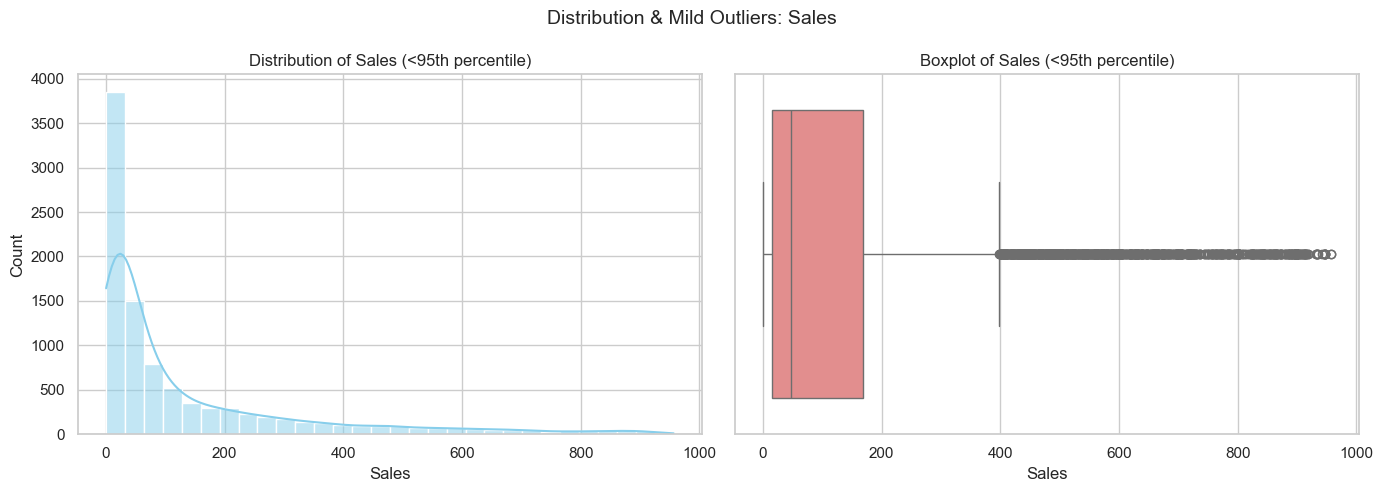

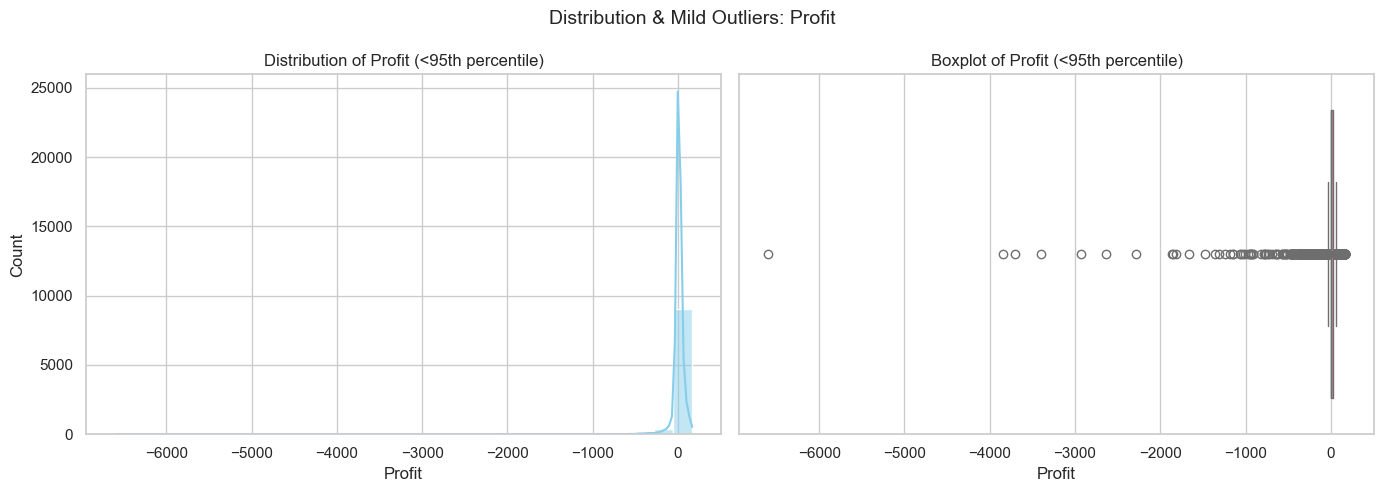

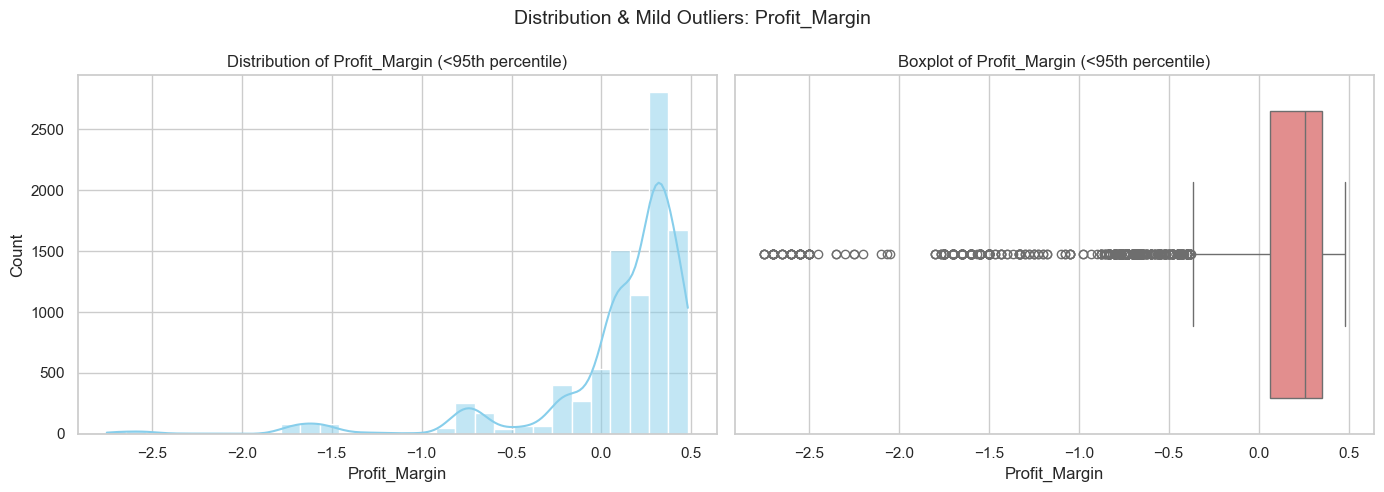

In [12]:
# 1. Sales and Profit Distribution
# Objective: Understand the overall distribution of sales and profit margin.

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Features to visualize
features = ['Sales', 'Profit', 'Profit_Margin']

# Loop through each feature
for feature in features:
    # Filter data below 95th percentile to reduce extreme outliers
    upper_limit = df[feature].quantile(0.95)
    filtered = df[df[feature] < upper_limit]

    # Create subplots: histogram and boxplot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram with KDE
    sns.histplot(data=filtered, x=feature, bins=30, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {feature} (<95th percentile)')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Count')

    # Boxplot
    sns.boxplot(data=filtered, x=feature, ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot of {feature} (<95th percentile)')
    axes[1].set_xlabel(feature)

    plt.suptitle(f'Distribution & Mild Outliers: {feature}', fontsize=14)
    plt.tight_layout()
    plt.show()

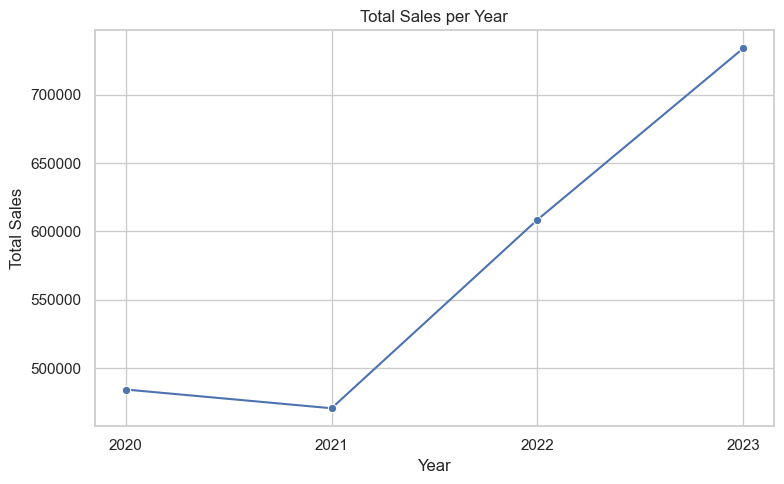

In [13]:
# 2. Sales Trend Over Time
# Objective: Analyze sales performance based on the time dimension.

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Aggregate total sales per year
yearly_sales = df.groupby('Invoice_Year')['Sales'].sum().reset_index()

# a.Plot the trend
plt.figure(figsize=(8, 5))
sns.lineplot(data=yearly_sales, x='Invoice_Year', y='Sales', marker='o')
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)

# Ensure X-axis (year) shows integer ticks only
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

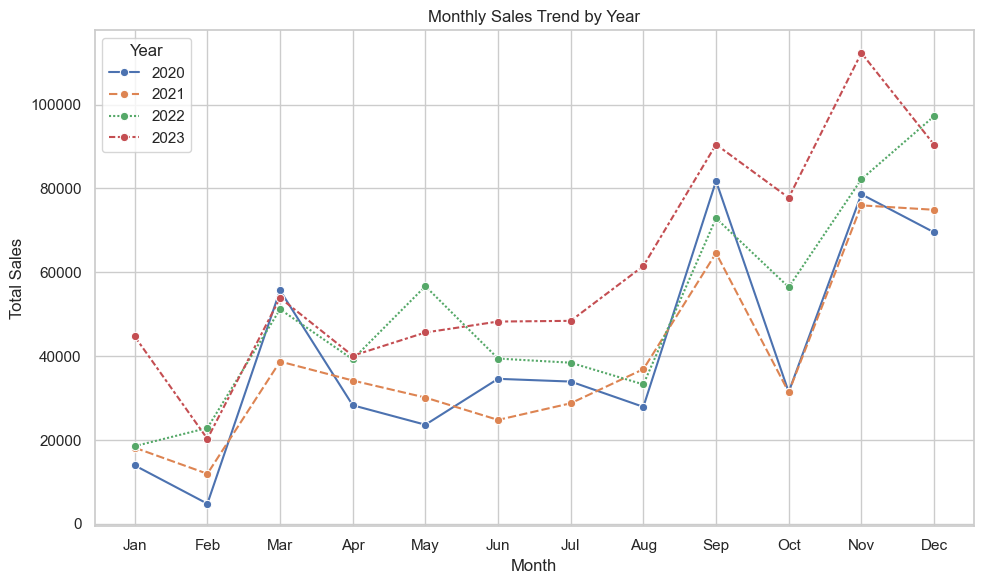

In [14]:
# b. Line Plot: Invoice_Month by Year
# Objective: Visualize the monthly sales trend across different years to identify seasonal patterns.

import calendar
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total sales per Month-Year
monthly_sales = df.groupby(['Invoice_Year', 'Invoice_Month'])['Sales'].sum().reset_index()

# Create 'Month_Label' for month abbreviations
monthly_sales['Month_Label'] = monthly_sales['Invoice_Month'].apply(lambda x: calendar.month_abbr[x])

# Pivot table for plotting sales trend by year
pivot_table = monthly_sales.pivot(index='Invoice_Month', columns='Invoice_Year', values='Sales')

# Plot the monthly sales trend by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, marker='o')
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13), labels=calendar.month_abbr[1:])
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

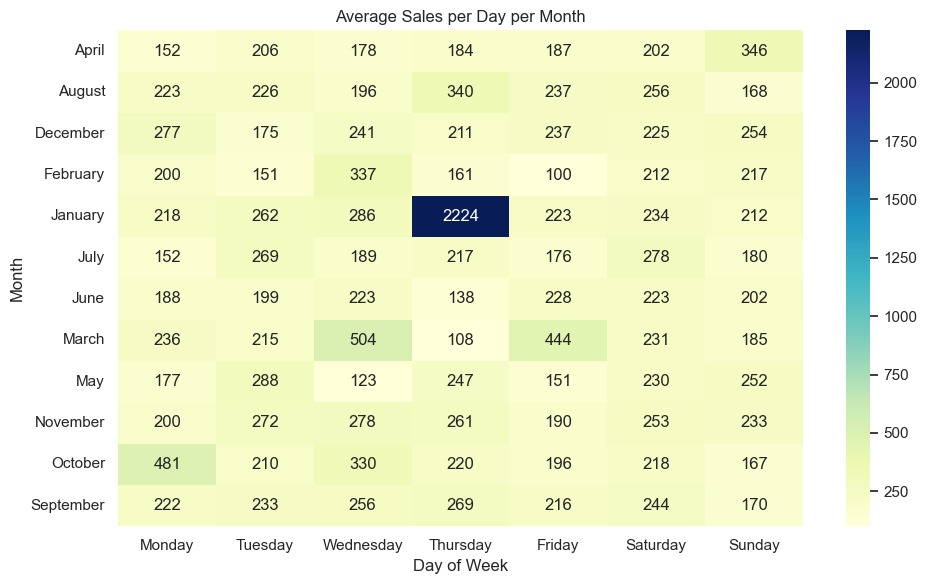

In [15]:
# c. Heatmap: Sales by Day of the Week and Month
# Objective: Visualize average sales distribution across days of the week for each month to identify weekly and monthly patterns.

import matplotlib.pyplot as plt
import seaborn as sns

# Add day of week and month columns (if not already present)
df['Day_of_Week'] = df['Order Date'].dt.day_name()
df['Month'] = df['Order Date'].dt.month_name()

# Calculate average sales by month and day of week
heatmap_data = df.groupby(['Month', 'Day_of_Week'])['Sales'].mean().unstack()

# Optional: Order days to match calendar sequence
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[day_order]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Average Sales per Day per Month')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

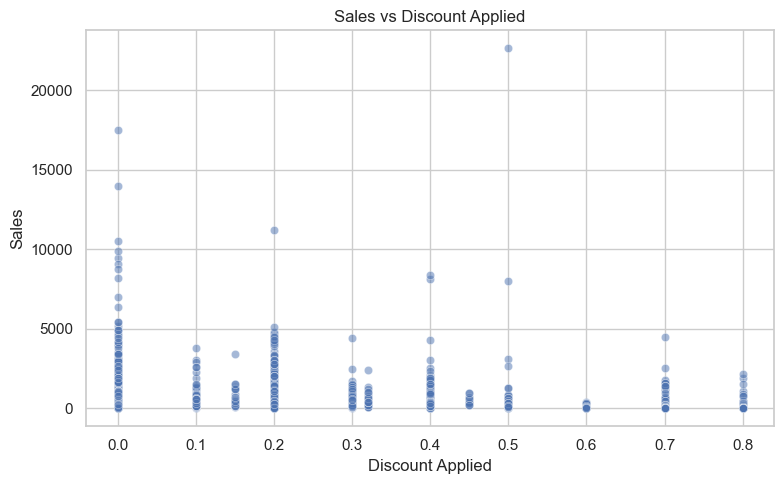

In [16]:
# 3. Discount Effectiveness
# Objective: Assess whether applying discounts increases revenue.

# a. Scatter Plot: Discount vs Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Sales', alpha=0.5)
plt.title('Sales vs Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

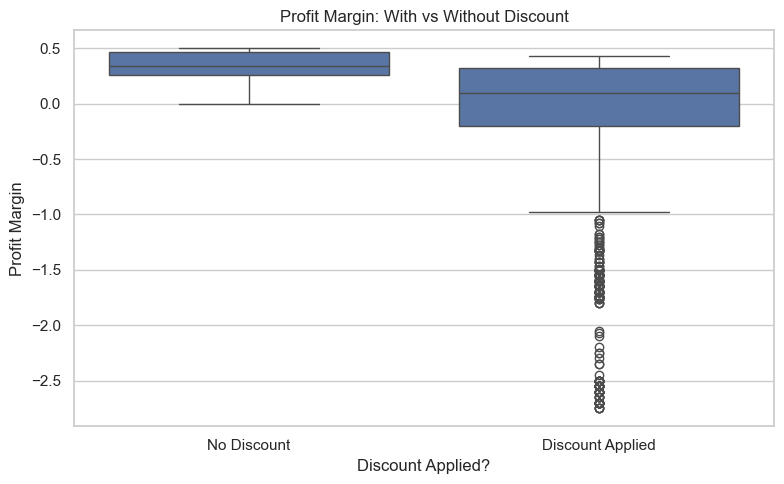

In [17]:
# b. Boxplot: Profit Margin With vs Without Discount

# Create flag indicating whether a discount was applied
df['Has_Discount'] = df['Discount_Applied'] > 0

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Has_Discount', y='Profit_Margin')
plt.title('Profit Margin: With vs Without Discount')
plt.xlabel('Discount Applied?')
plt.ylabel('Profit Margin')
plt.xticks([0, 1], ['No Discount', 'Discount Applied'])
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/2316024939.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_sales_by_discount, x='Discount_Bin', y='Sales', palette='Blues_d')


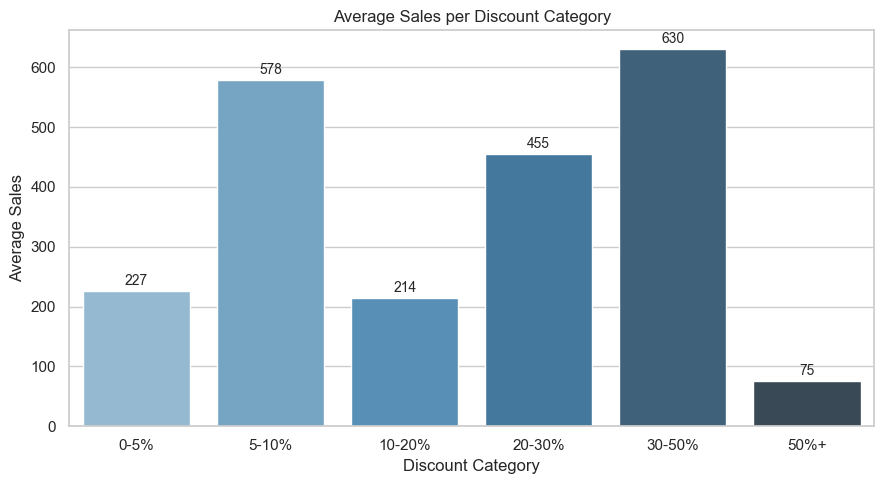

In [18]:
# c. Bar Chart: Average Sales per Discount Category (Binning)

# Create discount categories (binning)
df['Discount_Bin'] = pd.cut(
    df['Discount'],
    bins=[-0.01, 0.05, 0.10, 0.20, 0.30, 0.50, 1.0],
    labels=['0-5%', '5-10%', '10-20%', '20-30%', '30-50%', '50%+']
)

# Calculate average sales per discount bin
avg_sales_by_discount = df.groupby('Discount_Bin', observed=True)['Sales'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(9, 5))
ax = sns.barplot(data=avg_sales_by_discount, x='Discount_Bin', y='Sales', palette='Blues_d')

# Add labels on each bar
for i, row in avg_sales_by_discount.iterrows():
    ax.text(i, row['Sales'] + 5, f"{row['Sales']:.0f}", ha='center', va='bottom', fontsize=10)

plt.title('Average Sales per Discount Category')
plt.xlabel('Discount Category')
plt.ylabel('Average Sales')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

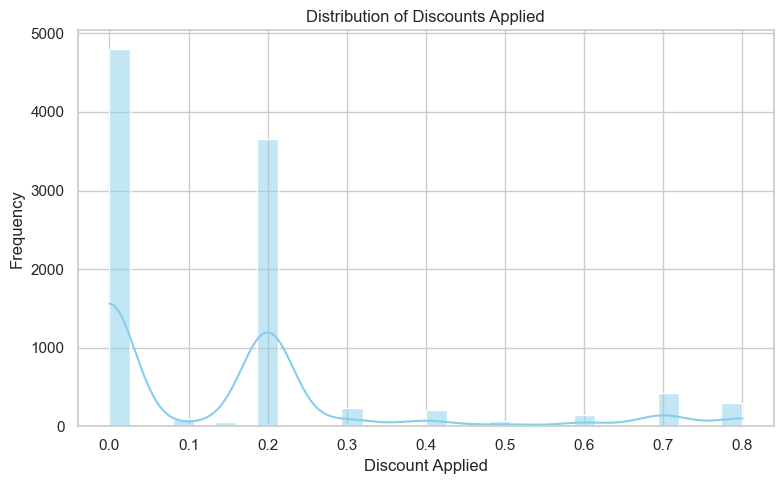

In [19]:
# d. Visualization of Discount Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Discount', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Discounts Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Summary statistics for the Discount column
df['Discount'].describe()

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/2136117172.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='High_Profit_Margin_Flag', palette='Set2')


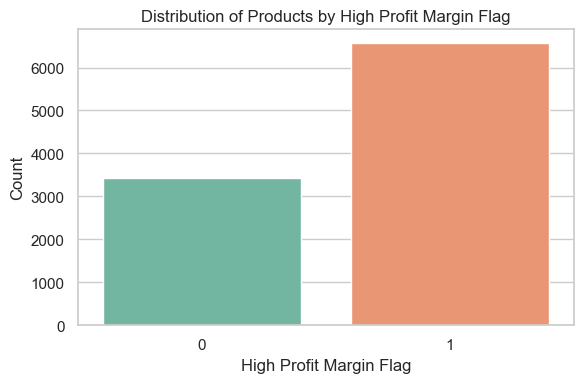

In [21]:
# 4. Profit Margin Segmentation
# Objective: Identify products or customers with the highest and lowest profit margins.

# a. Countplot: High_Profit_Margin_Flag
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='High_Profit_Margin_Flag', palette='Set2')
plt.title('Distribution of Products by High Profit Margin Flag')
plt.xlabel('High Profit Margin Flag')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/1804520457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product', y='Profit_Margin', palette='Set3')


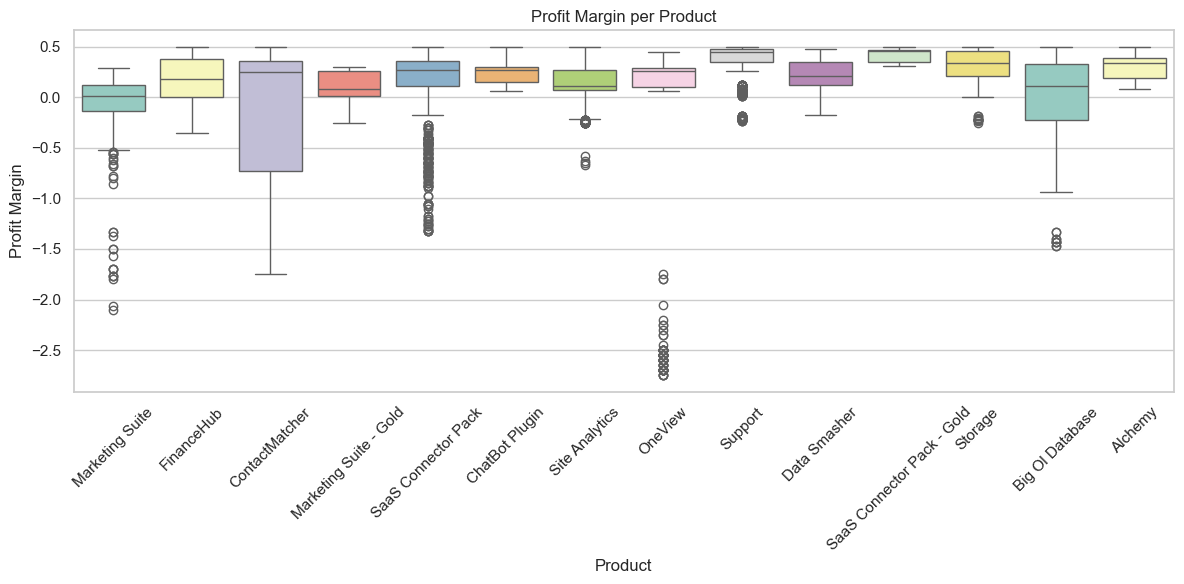

In [22]:
# b. Boxplot: Profit Margin by Product Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product', y='Profit_Margin', palette='Set3')
plt.title('Profit Margin per Product')
plt.xlabel('Product')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/4029925449.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Customer_Total_Sales', y='Customer', palette='viridis')


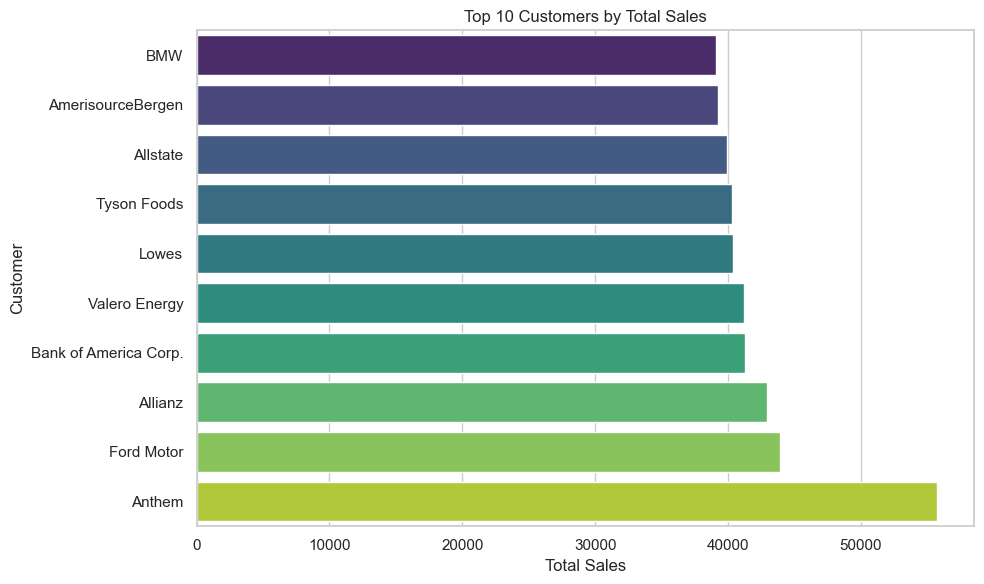

In [23]:
# 5. Customer Analytics
# Objective: Identify loyal customers and those contributing most to revenue.

# Get top 10 customers by highest total sales
top_customers = (
    df.groupby('Customer')['Customer_Total_Sales']
    .max()
    .sort_values(ascending=False)
    .head(10)
    .sort_values(ascending=True)  # sorted from smallest to largest for better barplot
).reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='Customer_Total_Sales', y='Customer', palette='viridis')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/2680772632.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_order_customers.values, y=top_order_customers.index, palette='magma')


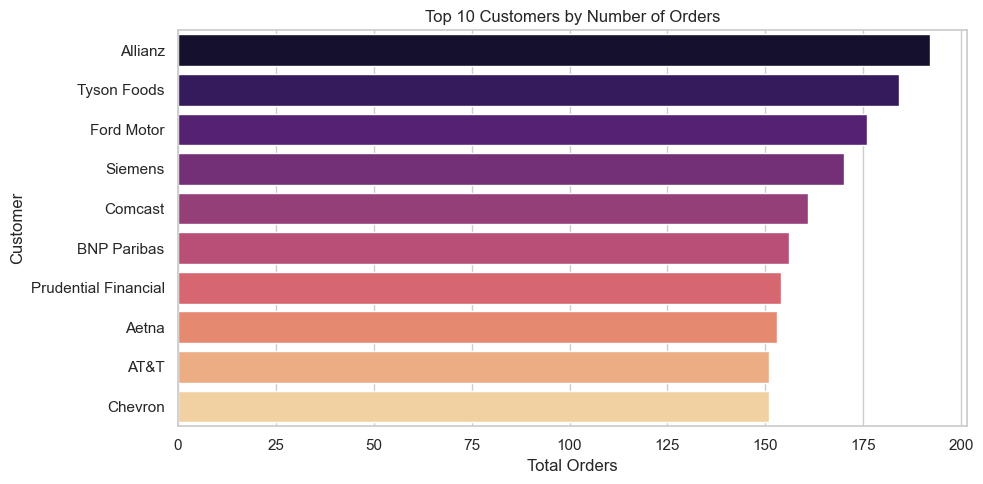

In [24]:
# b. Bar Chart – Top 10 Customers by Number of Orders
# Objective: Identify the customers with the highest number of orders.
    
# Top 10 customers with the most orders
top_order_customers = df.groupby('Customer')['Customer_Total_Orders'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_order_customers.values, y=top_order_customers.index, palette='magma')
plt.title('Top 10 Customers by Number of Orders')
plt.xlabel('Total Orders')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

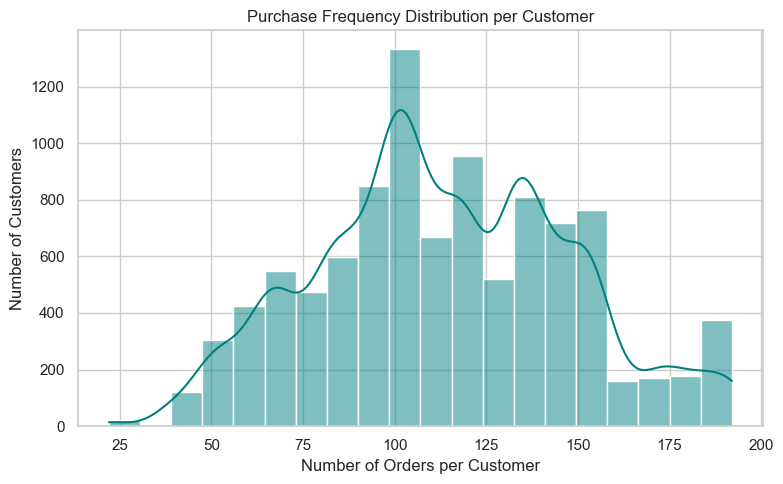

In [25]:
# c. Histogram – Purchase Frequency Distribution
# Objective: Visualize the distribution of purchase frequency across customers.
    
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer_Total_Orders'], bins=20, kde=True, color='teal')
plt.title('Purchase Frequency Distribution per Customer')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/2259075862.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Revenue_Category', palette='Set2', order=['High', 'Medium', 'Low'])


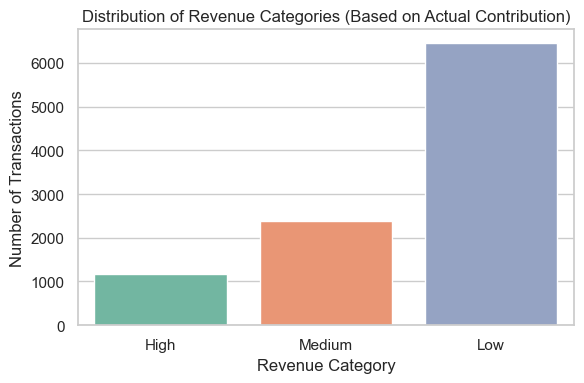

In [26]:
# 6. Revenue Category
# Objective: Group customers or products based on their revenue contribution.

# 1. Total sales per customer
customer_sales = df.groupby('Customer')['Customer_Total_Sales'].sum().sort_values(ascending=False)

# 2. Calculate cumulative contribution percentage
cumulative_sales_pct = customer_sales.cumsum() / customer_sales.sum()

# 3. Define segmentation based on contribution
def revenue_segment(pct):
    if pct <= 0.2:
        return 'High'
    elif pct <= 0.5:
        return 'Medium'
    else:
        return 'Low'

# 4. Apply segmentation
revenue_category = cumulative_sales_pct.apply(revenue_segment).rename('Revenue_Category')

# 5. Create customer-level dataframe
customer_df = pd.DataFrame({
    'Customer': customer_sales.index,
    'Customer_Total_Sales': customer_sales.values,
    'Revenue_Category': revenue_category.values
})

# Drop 'Revenue_Category' column if it exists in the original dataframe to avoid duplication
if 'Revenue_Category' in df.columns:
    df = df.drop(columns=['Revenue_Category'])

# Merge revenue category back into the main dataframe
df = df.merge(customer_df[['Customer', 'Revenue_Category']], on='Customer', how='left')

# Plot the distribution of revenue categories
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Revenue_Category', palette='Set2', order=['High', 'Medium', 'Low'])
plt.title('Distribution of Revenue Categories (Based on Actual Contribution)')
plt.xlabel('Revenue Category')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

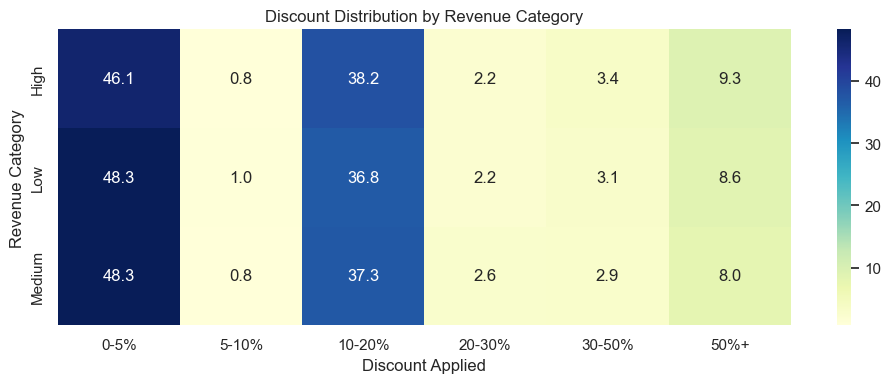

In [27]:
# Create discount bins based on 'Discount' column
df['Discount_Bin'] = pd.cut(
    df['Discount'],
    bins=[-0.01, 0.05, 0.10, 0.20, 0.30, 0.50, 1.0],
    labels=['0-5%', '5-10%', '10-20%', '20-30%', '30-50%', '50%+']
)

# Crosstab normalized by Revenue_Category (row-wise percentage)
ct_discount = pd.crosstab(df['Revenue_Category'], df['Discount_Bin'], normalize='index') * 100

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(ct_discount, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Discount Distribution by Revenue Category')
plt.xlabel('Discount Applied')
plt.ylabel('Revenue Category')
plt.tight_layout()
plt.show()

In [28]:
# 7. Sales per Unit and Efficiency
# Objective: Measure product efficiency in generating revenue per unit.

# Calculate Sales per Unit
df['Sales_per_Unit'] = df['Sales'] / df['Quantity']

# Calculate Profit Margin
df['Profit_Margin'] = df['Profit'] / df['Sales']

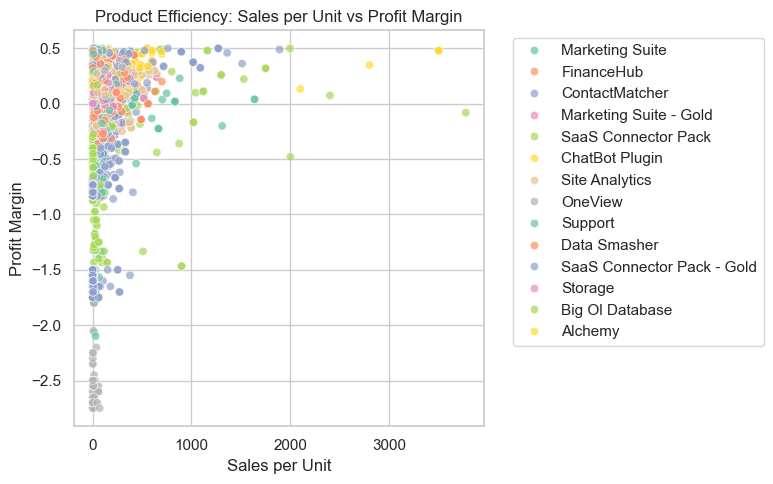

In [29]:
# a. Scatter Plot: Sales per Unit vs Profit Margin
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Sales_per_Unit',
    y='Profit_Margin',
    hue='Product',  # using existing column
    palette='Set2',
    alpha=0.7
)
plt.title('Product Efficiency: Sales per Unit vs Profit Margin')
plt.xlabel('Sales per Unit')
plt.ylabel('Profit Margin')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/3290622197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


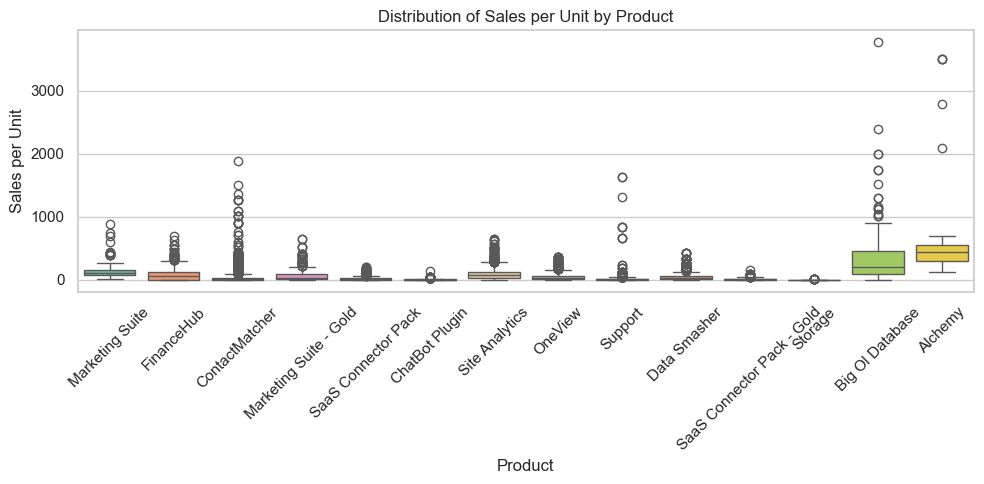

In [30]:
# b. Boxplot: Sales per Unit by Product
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x='Product',
    y='Sales_per_Unit',
    palette='Set2'
)
plt.title('Distribution of Sales per Unit by Product')
plt.xlabel('Product')
plt.ylabel('Sales per Unit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

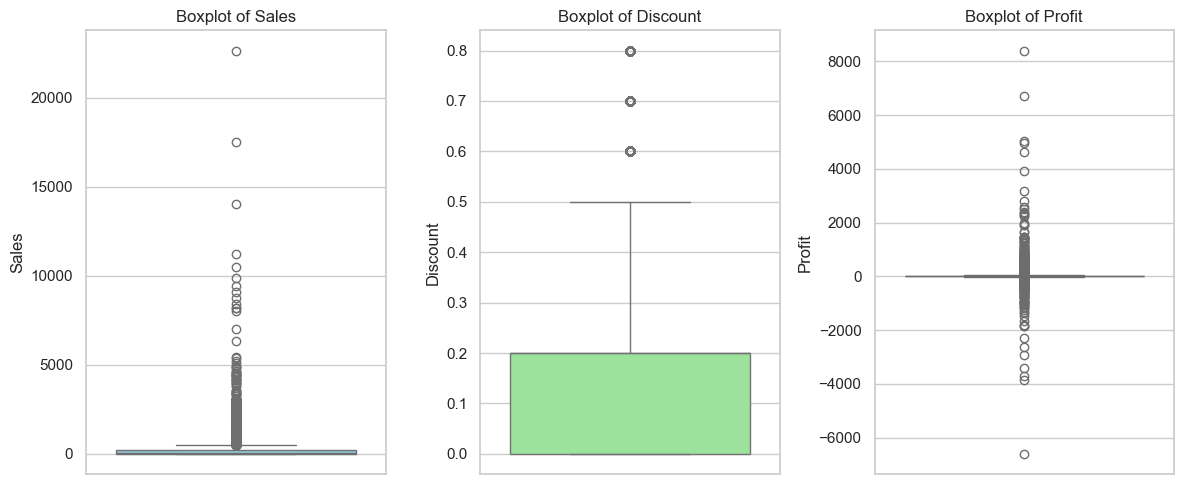

In [31]:
# 8. Outliers in Sales: Red Flag or Golden Opportunity?
# Objective: Evaluate significant anomalies in the data as potential risks or opportunities.

# a. Boxplot

plt.figure(figsize=(12, 5))

# 1. Sales
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='Sales', color='skyblue')
plt.title('Boxplot of Sales')

# 2. Discount
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='Discount', color='lightgreen')
plt.title('Boxplot of Discount')

# 3. Profit
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='Profit', color='salmon')
plt.title('Boxplot of Profit')

plt.tight_layout()
plt.show()

In [32]:
df[df['Sales'] > 5000].shape[0]

19

In [33]:
# Filter transactions with loss greater than $3,000
loss_transactions = df[df['Profit'] < -3000]
print(f"Number of transactions with loss > $3,000: {len(loss_transactions)}")

# Analyze discount distribution in loss transactions using bins
loss_discount_counts = loss_transactions['Discount'].value_counts(bins=[0, 0.1, 0.3, 0.5, 0.7, 1], sort=False)
print("\nDiscount distribution in loss transactions:")
print(loss_discount_counts)

# Filter loss transactions with discounts between 50% and 70%
high_discount_losses = loss_transactions[(loss_transactions['Discount'] >= 0.5) & (loss_transactions['Discount'] <= 0.7)]
print(f"\nNumber of loss transactions with 50–70% discount: {len(high_discount_losses)}")

# Percentage of 50–70% discount in all loss transactions
print(f"Percentage of 50–70% discount among large loss transactions: {len(high_discount_losses) / len(loss_transactions) * 100:.2f}%")


Number of transactions with loss > $3,000: 4

Discount distribution in loss transactions:
(-0.001, 0.1]    0
(0.1, 0.3]       0
(0.3, 0.5]       1
(0.5, 0.7]       2
(0.7, 1.0]       1
Name: count, dtype: int64

Number of loss transactions with 50–70% discount: 3
Percentage of 50–70% discount among large loss transactions: 75.00%


In [34]:
# b. Highlight and Count Extreme Outliers (Z-Score Method)

from scipy.stats import zscore

# Calculate z-scores for the columns analyzed
df['Z_Sales'] = zscore(df['Sales'])
df['Z_Profit'] = zscore(df['Profit'])
df['Z_Discount'] = zscore(df['Discount'])

# Define outlier threshold (absolute z-score > 3)
sales_outliers = df[df['Z_Sales'].abs() > 3]
profit_outliers = df[df['Z_Profit'].abs() > 3]
discount_outliers = df[df['Z_Discount'].abs() > 3]

# Print the counts of outliers
print(f"Number of Sales outliers: {len(sales_outliers)}")
print(f"Number of Profit outliers: {len(profit_outliers)}")
print(f"Number of Discount outliers: {len(discount_outliers)}")


Number of Sales outliers: 127
Number of Profit outliers: 107
Number of Discount outliers: 300


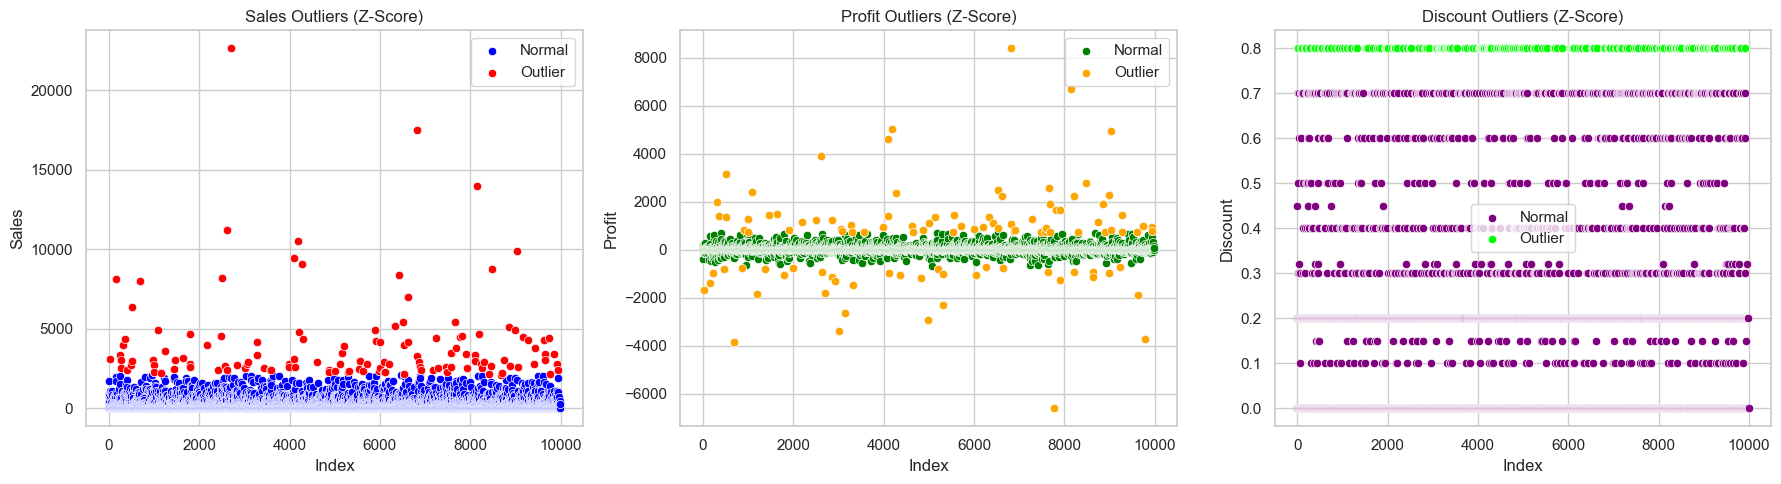

In [35]:
# Visualization of Outliers Based on Z-Score

plt.figure(figsize=(18, 5))

# Plot 1: Sales Outliers
plt.subplot(1, 3, 1)
sns.scatterplot(x=df.index, y=df['Sales'], color='blue', label='Normal')
sns.scatterplot(x=sales_outliers.index, y=sales_outliers['Sales'], color='red', label='Outlier')
plt.title('Sales Outliers (Z-Score)')
plt.xlabel('Index')
plt.ylabel('Sales')

# Plot 2: Profit Outliers
plt.subplot(1, 3, 2)
sns.scatterplot(x=df.index, y=df['Profit'], color='green', label='Normal')
sns.scatterplot(x=profit_outliers.index, y=profit_outliers['Profit'], color='orange', label='Outlier')
plt.title('Profit Outliers (Z-Score)')
plt.xlabel('Index')
plt.ylabel('Profit')

# Plot 3: Discount Outliers
plt.subplot(1, 3, 3)
sns.scatterplot(x=df.index, y=df['Discount'], color='purple', label='Normal')
sns.scatterplot(x=discount_outliers.index, y=discount_outliers['Discount'], color='lime', label='Outlier')
plt.title('Discount Outliers (Z-Score)')
plt.xlabel('Index')
plt.ylabel('Discount')

plt.tight_layout()
plt.show()

In [36]:
# c. Analysis: Who Are They? (Red Flag or Golden Opportunity?)

# Check some examples of sales outliers
sales_outliers[['Customer', 'Sales', 'Profit', 'Discount', 'Segment', 'Product']]\
    .sort_values(by='Sales', ascending=False)\
    .head(10)

,Customer,Sales,Profit,Discount,Segment,Product
2697,Anthem,22638.480,-1811.0784,0.5,Enterprise,Big Ol Database
6826,Coca-Cola,17499.950,8399.9760,0.0,Strategic,Alchemy
8153,Mondelez International,13999.960,6719.9808,0.0,SMB,Alchemy
2623,Trafigura Group,11199.968,3919.9888,0.2,Enterprise,Alchemy
4190,Lowes,10499.970,5039.9856,0.0,SMB,Alchemy
9039,Valero Energy,9892.740,4946.3700,0.0,SMB,ContactMatcher
4098,Anthem,9449.950,4630.4755,0.0,SMB,ContactMatcher
4277,Lowes,9099.930,2365.9818,0.0,Strategic,Big Ol Database
8488,Honda Motor,8749.950,2799.9840,0.0,SMB,Big Ol Database
6425,BMW,8399.976,1119.9968,0.4,SMB,Alchemy


In [37]:
# d. Are the Outliers Mostly from Corporate / Enterprise Segment?

# Check the segment distribution of sales outliers
sales_outliers['Segment'].value_counts(normalize=True)

Segment
SMB           0.480315
Strategic     0.307087
Enterprise    0.212598
Name: proportion, dtype: float64

In [38]:
# e. Does a High Discount Lead to Negative Profit?
# Transactions with negative profit
negative_profit = df[df['Profit'] < 0]

# Average discount in loss-making transactions
print("Average discount in loss transactions:", negative_profit['Discount'].mean())

# Compare with average discount for all transactions
print("Average discount overall:", df['Discount'].mean())

Average discount in loss transactions: 0.48088722608230894
Average discount overall: 0.15620272163297977


In [39]:
# f. Are Outliers Driven by 1-2 Customers Dominating Sales?

# Check top customers among sales outliers
top_customers = sales_outliers['Customer'].value_counts().head(5)
print(top_customers)

# Calculate the proportion of top 5 customers in total outliers
total_outlier = sales_outliers.shape[0]
proportion = top_customers.sum() / total_outlier
print(f"Proportion of top 5 customers in outliers: {proportion:.2%}")

Customer
Lukoil                   5
BMW                      4
Bank of America Corp.    4
Daimler                  3
Tyson Foods              3
Name: count, dtype: int64
Proportion of top 5 customers in outliers: 14.96%


In [40]:
# g. Is There Any Indication of Data Entry Errors (e.g., 100% Discount)?
# Check for extreme discounts (e.g., 99% or more)
extreme_discount = df[df['Discount'] >= 0.99]

# Display relevant columns for these extreme discount entries
print(extreme_discount[['Customer', 'Product', 'Sales', 'Profit', 'Discount']])


Empty DataFrame
Columns: [Customer, Product, Sales, Profit, Discount]
Index: []


In [41]:
 # 9. RFM Analysis (Recency, Frequency, Monetary)

import pandas as pd

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Define a snapshot date (one day after the latest order) for recency calculation
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics per customer
rfm = df.groupby('Customer').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,  # Recency: days since last purchase
    'Order ID': 'nunique',                                   # Frequency: number of unique orders
    'Sales': 'sum'                                           # Monetary: total sales amount
}).reset_index()

# Rename columns for clarity
rfm.columns = ['Customer', 'Recency', 'Frequency', 'Monetary']

# Score each metric into quartiles (1-4)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1]).astype(int)  # Lower recency days = higher score
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4]).astype(int)

# Combine scores to form an RFM segment string
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Optional: Define RFM level labels based on segment scores
def rfm_level(df):
    if df['RFM_Segment'] == '444':
        return 'Best Customers'
    elif df['R_Score'] >= 3:
        return 'Loyal'
    elif df['F_Score'] >= 3:
        return 'Frequent'
    elif df['M_Score'] >= 3:
        return 'High-Value'
    else:
        return 'Others'

rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)

# Merge RFM results back to the main dataframe
df = df.merge(rfm[['Customer', 'Recency', 'Frequency', 'Monetary', 'RFM_Segment', 'RFM_Level']], 
              on='Customer', 
              how='left')

# Display the first 10 rows of the RFM table
rfm.head(10)

,Customer,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Level
0,AT&T,10,67,29462.3240,3,4,3,343,Loyal
1,Abbott Laboratories,13,31,12617.1140,2,1,1,211,Others
2,Aetna,22,76,27278.5930,2,4,3,243,Frequent
3,Airbus,28,58,29798.5930,1,3,4,134,Frequent
4,Allianz,2,102,42904.1670,4,4,4,444,Best Customers
5,Allstate,2,61,39941.6400,4,4,4,444,Best Customers
6,Alphabet,7,24,16116.4610,3,1,2,312,Loyal
7,Amazon,14,62,23189.2165,2,4,3,243,Frequent
8,American Express,8,71,33514.9210,3,4,4,344,Loyal
9,AmerisourceBergen,4,68,39234.7610,4,4,4,444,Best Customers


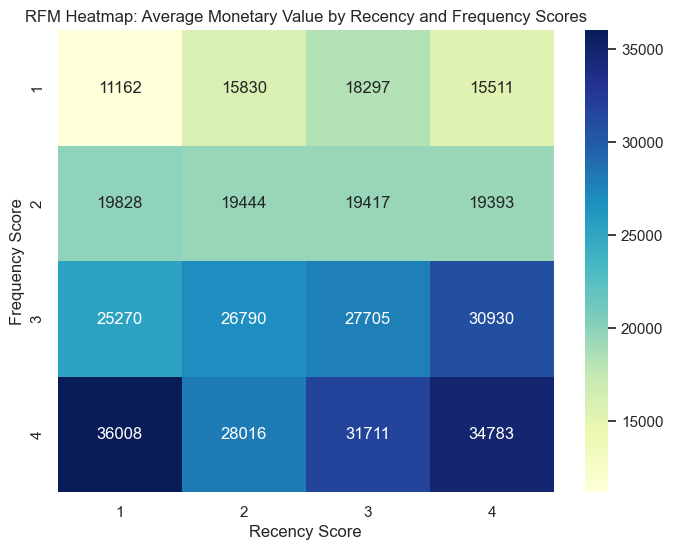

In [42]:
# a. RFM Segmentation Heatmap (Pivot Table

import seaborn as sns
import matplotlib.pyplot as plt

# Create pivot table for RFM heatmap
rfm_pivot = rfm.pivot_table(index='F_Score', columns='R_Score', values='Monetary', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('RFM Heatmap: Average Monetary Value by Recency and Frequency Scores')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.show()

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/225236361.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='RFM_Level', order=rfm['RFM_Level'].value_counts().index, palette='Set2')


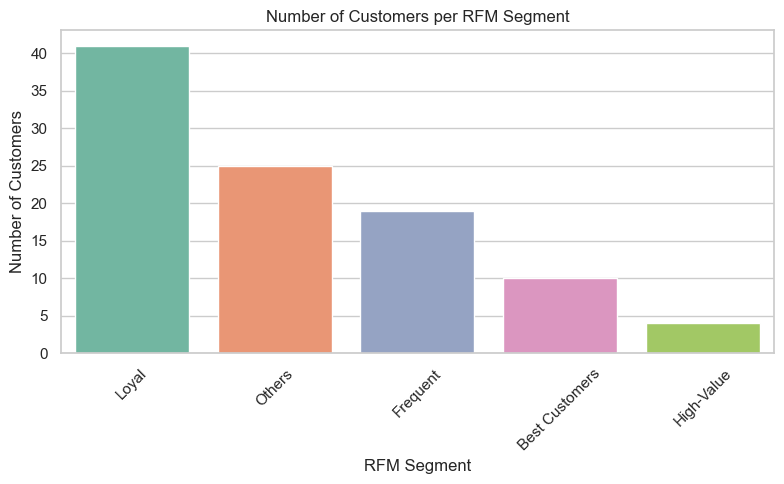

In [43]:
# b. Barplot: Number of Customers per RFM Segment

# Plot bar chart for customer count per RFM level
plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x='RFM_Level', order=rfm['RFM_Level'].value_counts().index, palette='Set2')
plt.title('Number of Customers per RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
# 10. Customer Lifetime Value (CLV) Calculation

import pandas as pd

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Calculate total sales and order count per customer, along with customer lifespan in days
clv_df = df.groupby('Customer').agg({
    'Sales': 'sum',
    'Order Date': [lambda x: (x.max() - x.min()).days + 1, 'count']
})

# Rename columns
clv_df.columns = ['Total_Sales', 'Customer_Lifespan_Days', 'Total_Orders']
clv_df.reset_index(inplace=True)

# Avoid division by zero in lifespan
clv_df['Customer_Lifespan_Days'] = clv_df['Customer_Lifespan_Days'].replace(0, 1)

# Calculate a simple CLV: average sales per day during customer's active period
clv_df['CLV'] = clv_df['Total_Sales'] / clv_df['Customer_Lifespan_Days']

# Merge CLV back to the main dataframe if needed
df = df.merge(clv_df[['Customer', 'CLV']], on='Customer', how='left')

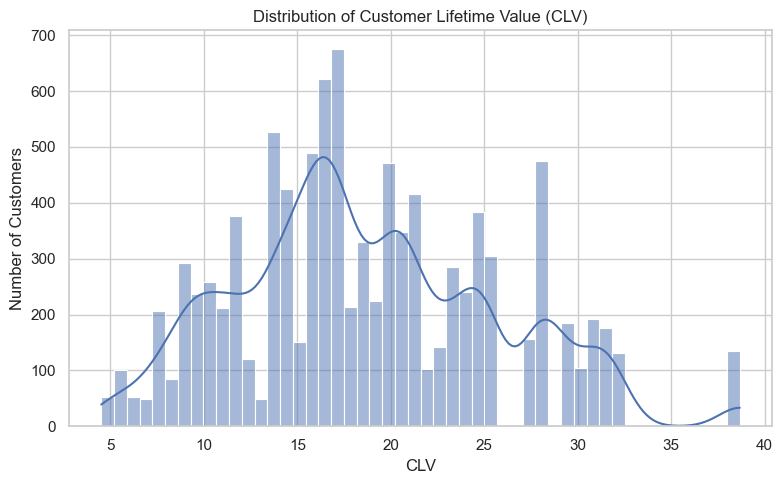

In [45]:
# a. Histogram of Customer Lifetime Value (CLV) Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['CLV'], bins=50, kde=True)
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('CLV')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/918883064.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clv_by_segment, x='CLV', y='Segment', palette='viridis')


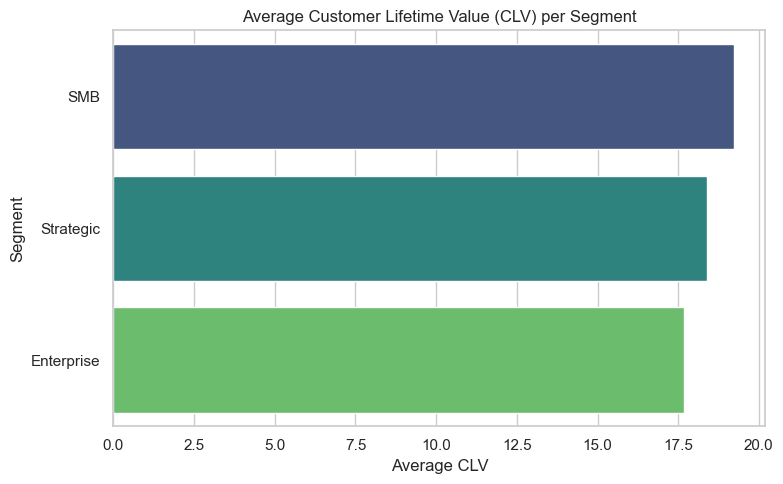

In [46]:
# b. Barplot of Average CLV per Segment

# Calculate average CLV per Segment
clv_by_segment = df.groupby('Segment')['CLV'].mean().reset_index().sort_values(by='CLV', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=clv_by_segment, x='CLV', y='Segment', palette='viridis')
plt.title('Average Customer Lifetime Value (CLV) per Segment')
plt.xlabel('Average CLV')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

In [47]:
# c. Top Customers Based on CLV

# Select top 10 customers by CLV
top_customers = clv_df.sort_values(by='CLV', ascending=False).head(10)

# Display key information
print(top_customers[['Customer', 'CLV', 'Total_Sales', 'Customer_Lifespan_Days']])

                 Customer        CLV  Total_Sales  Customer_Lifespan_Days
10                 Anthem  38.667044   55719.2100                    1441
16  Bank of America Corp.  32.080830   41255.9471                    1286
38             Ford Motor  31.509722   43893.0424                    1393
4                 Allianz  31.000121   42904.1670                    1384
92          Valero Energy  30.109875   41220.4188                    1369
89            Tyson Foods  29.200828   40326.3440                    1381
5                Allstate  28.307328   39941.6400                    1411
55                  Lowes  28.145162   40360.1630                    1434
13                    BMW  28.077435   39083.7900                    1392
9       AmerisourceBergen  27.944986   39234.7610                    1404


In [48]:
# 11. Calculating Churn Rate
# A customer is considered churned if they have no repeat purchase within 90 days.

# 1. Get the last transaction date per customer
last_tx = df.groupby('Customer')['Order Date'].max().reset_index()
last_tx.columns = ['Customer', 'Last_Order_Date']

# 2. Calculate days since last transaction
snapshot_date = df['Order Date'].max()
last_tx['Days_Since_Last_Order'] = (snapshot_date - last_tx['Last_Order_Date']).dt.days

# 3. Mark churn if no purchase in last 90 days
last_tx['Churn_Flag'] = (last_tx['Days_Since_Last_Order'] > 90).astype(int)

# 4. Merge churn flag back to main dataframe if needed
df = df.merge(last_tx[['Customer', 'Churn_Flag']], on='Customer', how='left')

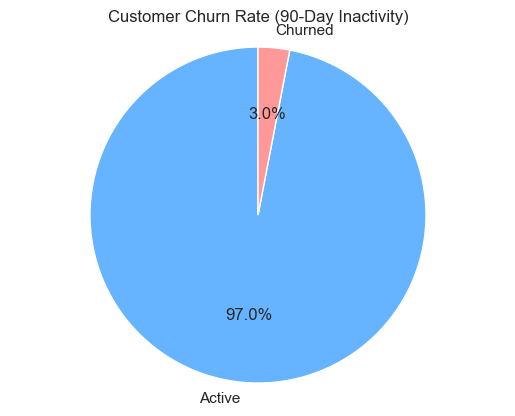

In [49]:
# a. Pie Chart: Churned vs Active Customers

import matplotlib.pyplot as plt

labels = ['Active', 'Churned']
sizes = last_tx['Churn_Flag'].value_counts().sort_index()

plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
plt.title('Customer Churn Rate (90-Day Inactivity)')
plt.axis('equal')
plt.show()

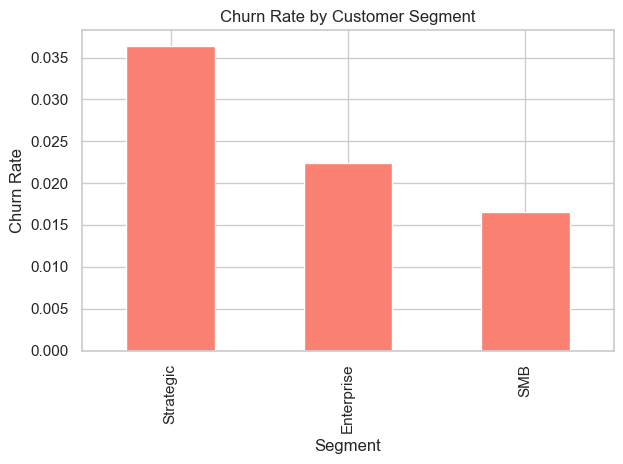

In [50]:
# b. Churn Rate by Segment

# Calculate average churn rate per segment
churn_segment = df.groupby('Segment')['Churn_Flag'].mean().sort_values(ascending=False)

# Plot bar chart
churn_segment.plot(kind='bar', color='salmon')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Segment')
plt.tight_layout()
plt.show()

In [51]:
# Descriptive Statistics and Correlation Analysis
# This section aims to provide an overview of the sales data characteristics through statistical measures such as mean, median, and distribution. Additionally, correlation analysis helps identify relationships among key variables—such as discount, sales, and profit—to uncover patterns that can support business decision-making.

In [52]:
# Descriptive Statistics

import pandas as pd
import numpy as np

# 1. Basic descriptive statistics
desc = df[['Sales', 'Profit', 'Profit_Margin', 'Discount', 'Quantity']].describe()
print("Descriptive Statistics:\n", desc)

# a. Skewness indication: comparing mean vs median
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
print(f"\nSales - Mean: {sales_mean:.2f}, Median: {sales_median:.2f}")
print("→ Sales data is likely *skewed* if the mean is much larger than the median.")

# b. Maximum sales (potential outlier)
max_sales = df['Sales'].max()
print(f"Maximum Sales (Potential Outlier): {max_sales:.2f}")

# c. Negative Profit & Profit Margin counts
neg_profit_count = (df['Profit'] < 0).sum()
total_count = df.shape[0]
neg_margin_count = (df['Profit_Margin'] < 0).sum()
print(f"\nNumber of transactions with negative profit: {neg_profit_count} ({neg_profit_count/total_count:.2%})")
print(f"Number of transactions with negative profit margin: {neg_margin_count} ({neg_margin_count/total_count:.2%})")

# d. Mean and Median Profit Margin
print(f"Mean Profit Margin: {df['Profit_Margin'].mean():.2f}")
print(f"Median Profit Margin: {df['Profit_Margin'].median():.2f}")

# e. Discount distribution
print(f"\nAverage Discount: {df['Discount'].mean():.2f}")
print(f"Maximum Discount: {df['Discount'].max():.2f}")

# f. Compare average discount between loss vs profit transactions
avg_discount_loss = df[df['Profit'] < 0]['Discount'].mean()
avg_discount_profit = df[df['Profit'] > 0]['Discount'].mean()
print(f"Average Discount (Loss Transactions): {avg_discount_loss:.2f}")
print(f"Average Discount (Profit Transactions): {avg_discount_profit:.2f}")

# g. Quantity statistics to check for bulk purchases
print(f"\nQuantity - Mean: {df['Quantity'].mean():.2f}, Median: {df['Quantity'].median():.2f}, Max: {df['Quantity'].max()}")
bulk_count = (df['Quantity'] > df['Quantity'].quantile(0.95)).sum()
print(f"Number of transactions with large quantity (top 5%): {bulk_count}")

# h. Correlation between Sales and Profit
corr_sales_profit = df[['Sales', 'Profit']].corr().iloc[0, 1]
print(f"\nCorrelation between Sales and Profit: {corr_sales_profit:.2f}")

# Count transactions by rounded discount values
discount_counts = df.groupby(df['Discount'].round(2)).size().reset_index(name='count')

# Sort to get the most common discount values
discount_counts_sorted = discount_counts.sort_values(by='count', ascending=False).head(50)

# Display frequent discount values
print("\nMost Frequently Used Discounts:")
for i, row in discount_counts_sorted.iterrows():
    print(f"- Discount {row['Discount']:.0%} used in {row['count']} transactions")

Descriptive Statistics:
               Sales       Profit  Profit_Margin     Discount     Quantity
count   9994.000000  9994.000000    9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896       0.120314     0.156203     3.789574
std      623.245101   234.260108       0.466754     0.206452     2.225110
min        0.444000 -6599.978000      -2.750000     0.000000     1.000000
25%       17.280000     1.728750       0.075000     0.000000     2.000000
50%       54.490000     8.666500       0.270000     0.200000     3.000000
75%      209.940000    29.364000       0.362500     0.200000     5.000000
max    22638.480000  8399.976000       0.500000     0.800000    14.000000

Sales - Mean: 229.86, Median: 54.49
→ Sales data is likely *skewed* if the mean is much larger than the median.
Maximum Sales (Potential Outlier): 22638.48

Number of transactions with negative profit: 1871 (18.72%)
Number of transactions with negative profit margin: 1871 (18.72%)
Mean Profit Margin: 0.12
M

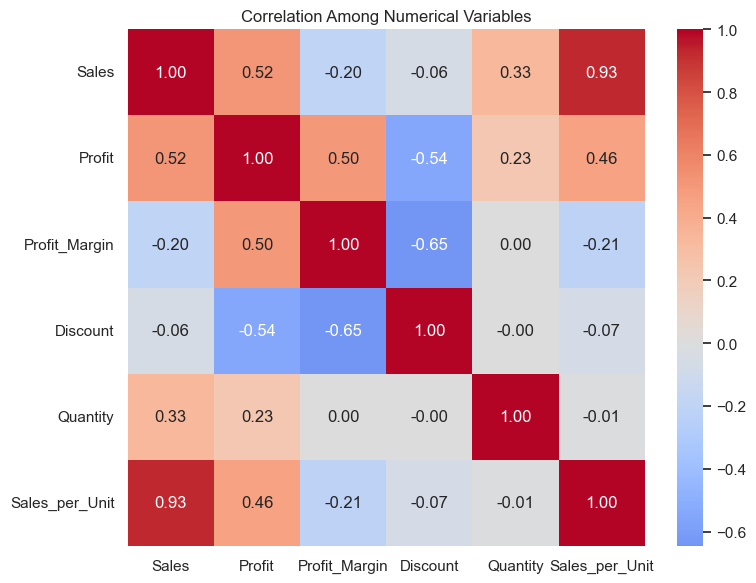

In [53]:
# Correlation Among Numerical Variables
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to analyze
cols = ['Sales', 'Profit', 'Profit_Margin', 'Discount', 'Quantity', 'Sales_per_Unit']

# Calculate correlation matrix using Spearman method
corr_matrix = df[cols].corr(method='spearman')

# Visualize correlation matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Among Numerical Variables")
plt.tight_layout()
plt.show()

In [54]:
# Statistics by Segment
segment_detail = df.groupby('Segment').agg({
    'Sales': ['mean', 'sum'],
    'Profit': ['mean', 'sum'],
    'Profit_Margin': 'mean',
    'Discount': 'mean',
    'Customer': 'nunique'
}).sort_values(('Profit', 'mean'), ascending=False)

display(segment_detail)

Sales                   Profit              Profit_Margin  \
                  mean           sum       mean          sum          mean   
Segment                                                                      
Enterprise  240.972041  4.296531e+05  33.818664   60298.6785      0.142870   
Strategic   233.823300  7.061464e+05  30.456667   91979.1340      0.121203   
SMB         223.733644  1.161401e+06  25.836873  134119.2092      0.112050   

            Discount Customer  
                mean  nunique  
Segment                        
Enterprise  0.147128       76  
Strategic   0.158228       91  
SMB         0.158141       96

,Segment,Avg_Sales,Total_Sales,Avg_Profit,Total_Profit,Avg_Profit_Margin,Avg_Discount,Unique_Customers
0,Enterprise,240.972041,4.296531e+05,33.818664,60298.6785,0.142870,0.147128,76
1,Strategic,233.823300,7.061464e+05,30.456667,91979.1340,0.121203,0.158228,91
2,SMB,223.733644,1.161401e+06,25.836873,134119.2092,0.112050,0.158141,96


/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/1118808142.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Avg_Sales', data=segment_detail, ax=axes[0, 0], palette='Blues_d')
/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/1118808142.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Avg_Profit', data=segment_detail, ax=axes[0, 1], palette='Greens_d')
/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/1118808142.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

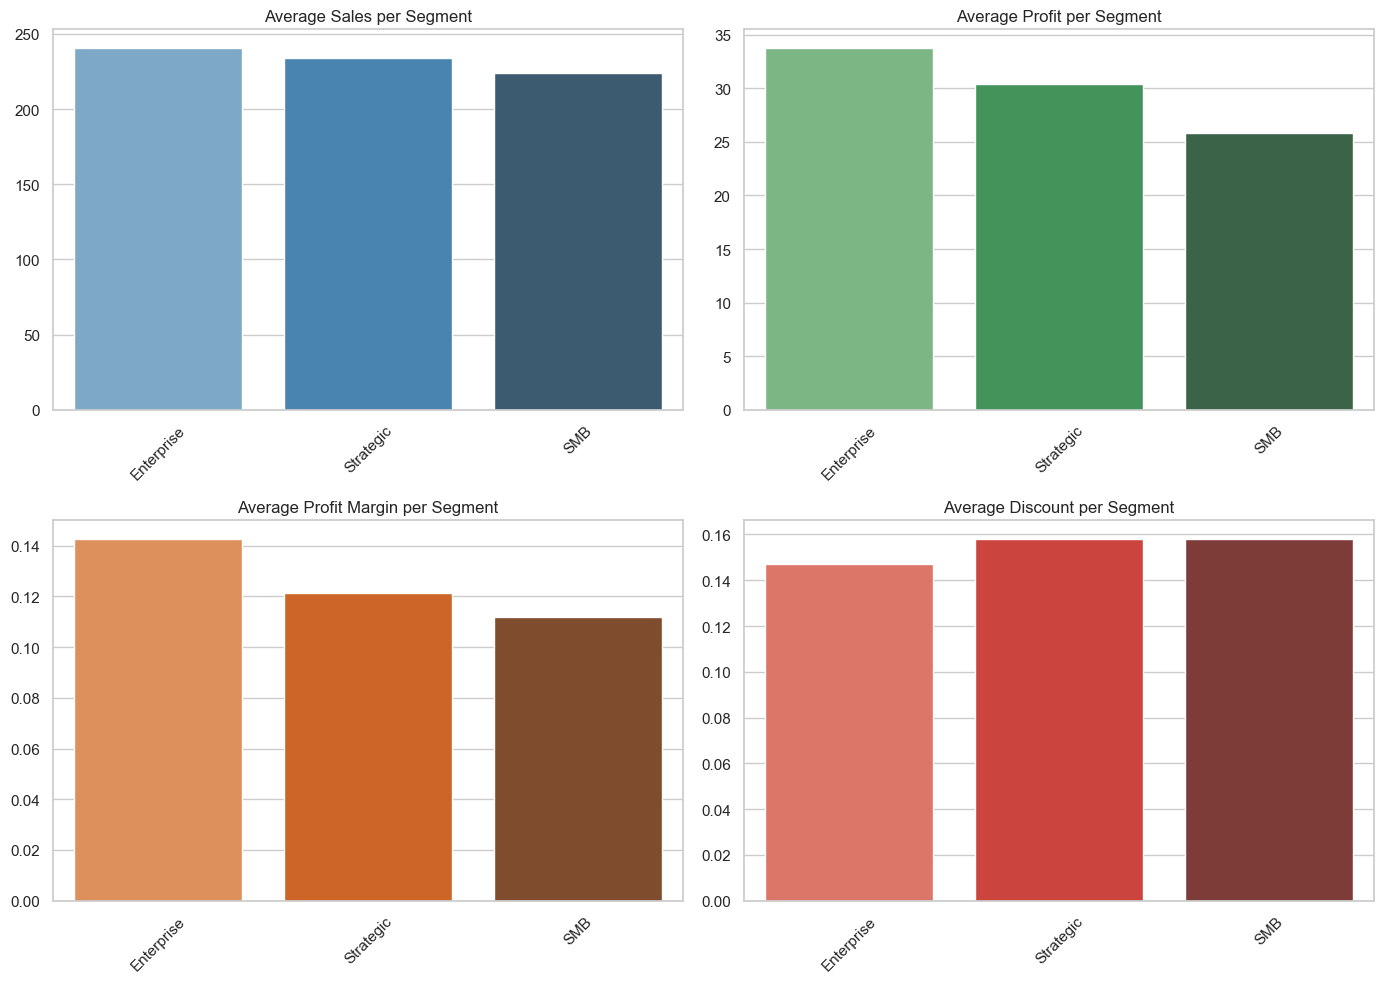

In [55]:
# Aggregate statistics per Segment
segment_detail = df.groupby('Segment').agg({
    'Sales': ['mean', 'sum'],
    'Profit': ['mean', 'sum'],
    'Profit_Margin': 'mean',
    'Discount': 'mean',
    'Customer': 'nunique'
}).sort_values(('Profit', 'mean'), ascending=False)

# Fix multi-index column names
segment_detail.columns = ['Avg_Sales', 'Total_Sales', 
                          'Avg_Profit', 'Total_Profit', 
                          'Avg_Profit_Margin', 'Avg_Discount', 
                          'Unique_Customers']
segment_detail = segment_detail.reset_index()

# Display aggregated table
display(segment_detail)

# Set visual style
sns.set(style="whitegrid")

# Visualization: Barplots per metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Average Sales per Segment
sns.barplot(x='Segment', y='Avg_Sales', data=segment_detail, ax=axes[0, 0], palette='Blues_d')
axes[0, 0].set_title('Average Sales per Segment')

# Average Profit per Segment
sns.barplot(x='Segment', y='Avg_Profit', data=segment_detail, ax=axes[0, 1], palette='Greens_d')
axes[0, 1].set_title('Average Profit per Segment')

# Average Profit Margin per Segment
sns.barplot(x='Segment', y='Avg_Profit_Margin', data=segment_detail, ax=axes[1, 0], palette='Oranges_d')
axes[1, 0].set_title('Average Profit Margin per Segment')

# Average Discount per Segment
sns.barplot(x='Segment', y='Avg_Discount', data=segment_detail, ax=axes[1, 1], palette='Reds_d')
axes[1, 1].set_title('Average Discount per Segment')

# Clean layout
for ax in axes.flat:
    ax.set_ylabel('')
    ax.set_xlabel('')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Average Value')

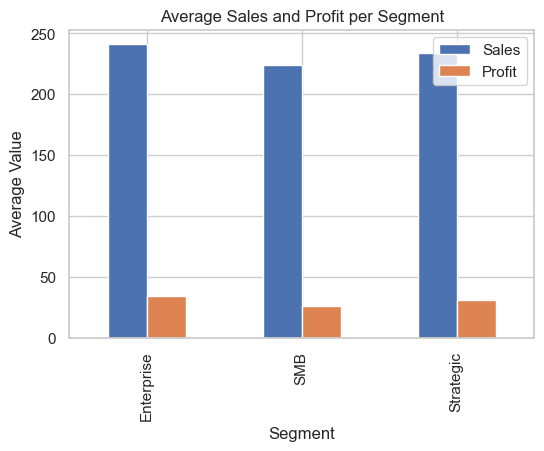

In [56]:
# Business Insights
# 1. Customer & Segment Insights

# a. Barplot of Average Sales & Profit per Segment
df.groupby('Segment')[['Sales', 'Profit']].mean().plot(kind='bar', figsize=(6,4))
plt.title('Average Sales and Profit per Segment')
plt.ylabel('Average Value')

Text(0, 0.5, '')

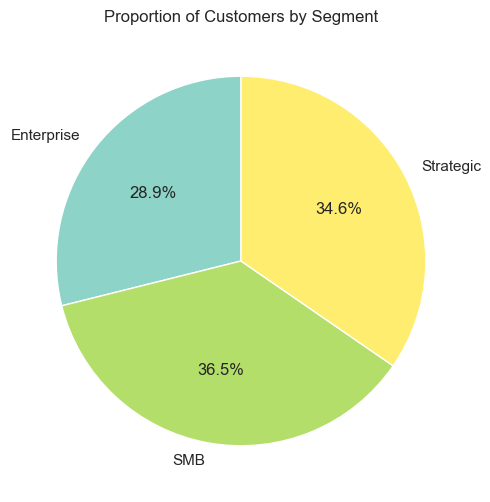

In [57]:
# b. Pie Chart of Customer Count Distribution per Segment
df.groupby('Segment')['Customer'].nunique().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6,6),
    cmap='Set3'
)
plt.title('Proportion of Customers by Segment')
plt.ylabel('')

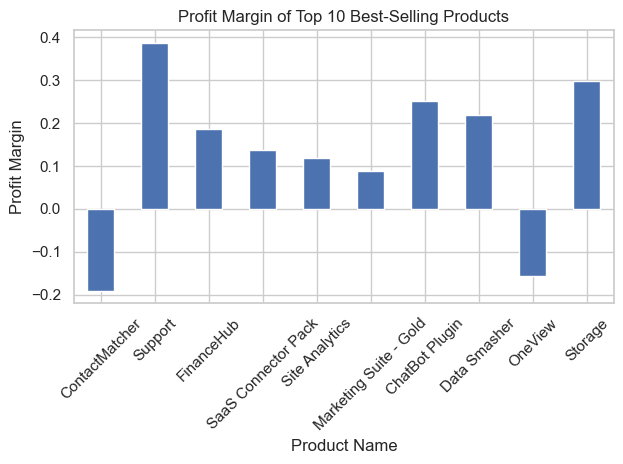

In [58]:
# 2. Product & Sales Insight

# Barplot: Average Profit Margin of Top 10 Best-Selling Products
top_products = df.groupby('Product').agg({
    'Quantity': 'sum',
    'Profit_Margin': 'mean'
}).sort_values('Quantity', ascending=False).head(10)

top_products.plot(kind='bar', y='Profit_Margin', legend=False)
plt.title('Profit Margin of Top 10 Best-Selling Products')
plt.ylabel('Profit Margin')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/199147330.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Profit_Category', y='Discount', palette=['salmon', 'lightgreen'])


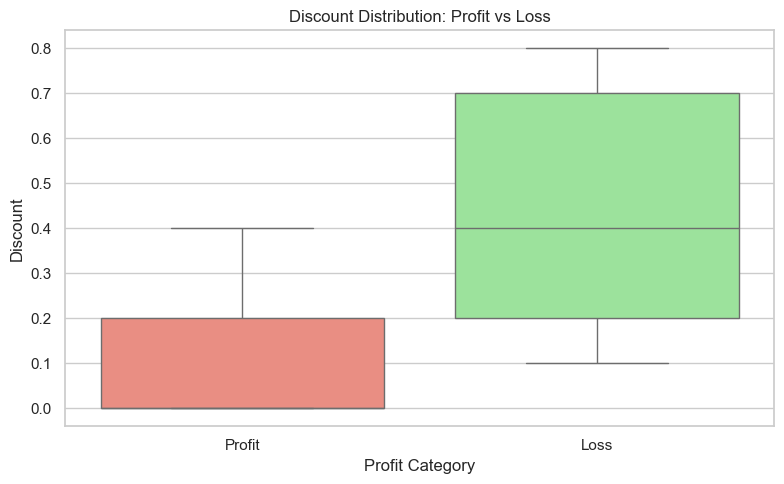

In [59]:
# 3. Promo and Profitability Insight

# Categorize profit into 'Loss' and 'Profit'
df['Profit_Category'] = np.where(df['Profit'] < 0, 'Loss', 'Profit')

# Plot boxplot of Discount by Profit Category
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Profit_Category', y='Discount', palette=['salmon', 'lightgreen'])
plt.title('Discount Distribution: Profit vs Loss')
plt.xlabel('Profit Category')
plt.ylabel('Discount')
plt.tight_layout()
plt.show()

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/2846848161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Has_Discount', y='Profit', estimator='mean', palette='Set2')


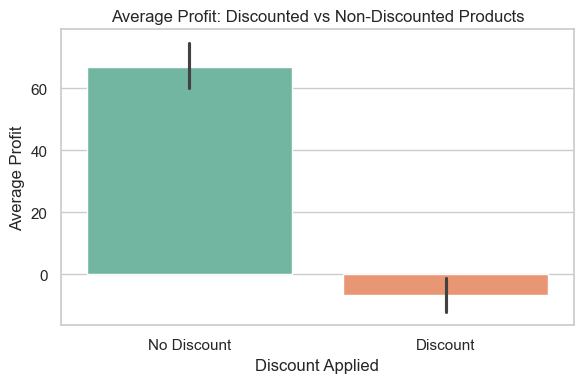

In [60]:
# Bar Chart: Average Profit for Discounted vs Non-Discounted Products

# Bar Chart 
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Has_Discount', y='Profit', estimator='mean', palette='Set2')
plt.title('Average Profit: Discounted vs Non-Discounted Products')
plt.xlabel('Discount Applied')
plt.ylabel('Average Profit')
plt.xticks([0, 1], ['No Discount', 'Discount'])
plt.tight_layout()
plt.show()

/var/folders/9_/06hc1w9969g8zktjcjcs_f6w0000gn/T/ipykernel_56138/2498763212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Has_Discount', y='Profit', palette='Set3')


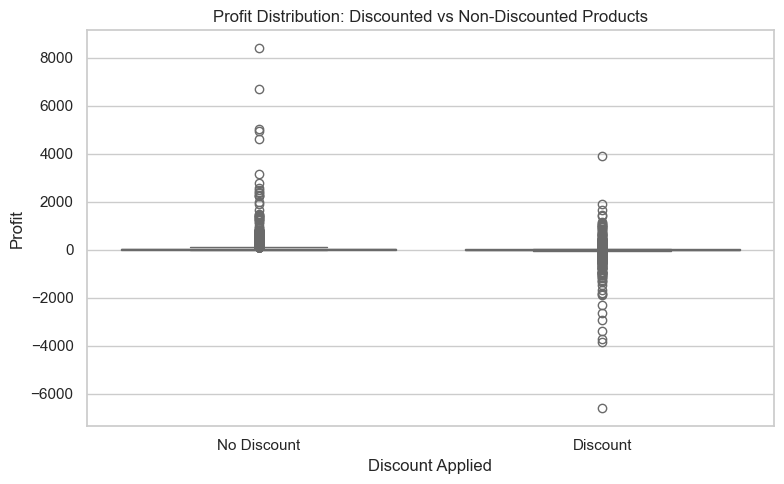

In [61]:
# Side-by-Side Boxplot: Profit Distribution

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Has_Discount', y='Profit', palette='Set3')
plt.title('Profit Distribution: Discounted vs Non-Discounted Products')
plt.xlabel('Discount Applied')
plt.ylabel('Profit')
plt.xticks([0, 1], ['No Discount', 'Discount'])
plt.tight_layout()
plt.show()


In [62]:
# General information about the dataset
df.info()

# Summary descriptive statistics (including all columns)
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Row ID                   9994 non-null   int64         
 1   Order ID                 9994 non-null   object        
 2   Order Date               9994 non-null   datetime64[ns]
 3   Date Key                 9994 non-null   int64         
 4   Contact Name             9994 non-null   object        
 5   Country                  9994 non-null   object        
 6   City                     9994 non-null   object        
 7   Region                   9994 non-null   object        
 8   Subregion                9994 non-null   object        
 9   Customer                 9994 non-null   object        
 10  Customer ID              9994 non-null   int64         
 11  Industry                 9994 non-null   object        
 12  Segment                  9994 non-

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Invoice_Month,Invoice_Year,Invoice_Weekday,Discount_Applied,Profit_Margin,High_Profit_Margin_Flag,Sales_per_Unit,Customer_Total_Orders,Customer_Total_Sales,Invoice_YearMonth,Country_Total_Sales,Country_Profit,Day_of_Week,Month,Has_Discount,Discount_Bin,Revenue_Category,Z_Sales,Z_Profit,Z_Discount,Recency,Frequency,Monetary,RFM_Segment,RFM_Level,CLV,Churn_Flag,Profit_Category
count,9994.000000,9994,9994,9.994000e+03,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994.000000,9994.000000,9994,9994,9994,9994,9994,9.994000e+03,9.994000e+03,9.994000e+03,9994.000000,9994.000000,9994.000000,9994,9994,9994.000000,9994.000000,9994
unique,NaN,5009,NaN,NaN,793,48,262,3,12,99,NaN,10,3,14,9994,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,NaN,7,12,2,6,3,NaN,NaN,NaN,NaN,NaN,NaN,40,5,NaN,NaN,2
top,NaN,EMEA-2023-100111,NaN,NaN,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,NaN,Finance,SMB,ContactMatcher,16GRM07R1K,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,2023-12,NaN,NaN,Tuesday,November,True,0-5%,Low,NaN,NaN,NaN,NaN,NaN,NaN,444,Loyal,NaN,NaN,Profit
freq,NaN,14,NaN,NaN,37,2001,922,4219,2507,192,NaN,2127,5191,1842,1,NaN,NaN,NaN,NaN,NaN,NaN,1871,NaN,NaN,NaN,NaN,NaN,NaN,477,NaN,NaN,1871,1462,5196,4798,6446,NaN,NaN,NaN,NaN,NaN,NaN,1489,4077,NaN,NaN,8123
mean,4997.500000,NaN,2022-05-01 00:07:12.259355648,2.021803e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.771963,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896,7.814889,2021.722934,NaN,0.519912,0.120314,0.656394,60.919569,113.292976,25876.306929,NaN,181366.650423,22676.534889,NaN,NaN,NaN,NaN,NaN,-4.550204e-17,1.066454e-18,7.251887e-17,16.872524,56.438963,25876.306929,NaN,NaN,18.699883,0.023614,NaN
min,1.000000,NaN,2020-01-04 00:00:00,2.020010e+07,NaN,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,1.000000,2020.000000,NaN,0.000000,-2.750000,0.000000,0.336000,22.000000,5402.902000,NaN,919.910000,-25729.356300,NaN,NaN,NaN,NaN,NaN,-3.681144e-01,-2.829746e+01,-7.566435e-01,1.000000,13.000000,5402.902000,NaN,NaN,4.509935,0.000000,NaN
25%,2499.250000,NaN,2021-05-23 00:00:00,2.021052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1024.000000,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750,5.000000,2021.000000,NaN,0.000000,0.075000,0.000000,5.470000,90.000000,18886.152000,NaN,49095.840000,-12607.887000,NaN,NaN,NaN,NaN,NaN,-3.410996e-01,-1.149555e-01,-7.566435e-01,4.000000,42.000000,18886.152000,NaN,NaN,13.730572,0.000000,NaN
50%,4997.500000,NaN,2022-06-27 00:00:00,2.022063e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.000000,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500,9.000000,2022.000000,NaN,1.000000,0.270000,1.000000,16.270000,110.000000,24384.885000,NaN,116511.914000,8401.800400,NaN,NaN,NaN,NaN,NaN,-2.813929e-01,-8.533846e-02,2.121533e-01,9.000000,57.000000,24384.885000,NaN,NaN,17.595823,0.000000,NaN
75%,7495.750000,NaN,2023-05-15 00:00:00,2.023052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1076.000000,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000,11.000000,2023.000000,NaN,1.000000,0.362500,1.000000,63.940000,137.000000,32993.045800,NaN,313169.881000,74989.089100,NaN,NaN,NaN,NaN,NaN,-3.196013e-02,3.018606e-03,2.121533e-01,22.000000,65.000000,32993.045800,NaN,NaN,23.169274,0.000000,NaN
max,9994.000000,NaN,2023-12-31 00:00:00,2.023123e+07,NaN,NaN,NaN,NaN,NaN,NaN,1101.000000,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000,12.000000,2023.000000,NaN,1.000000,0.500000,1.000000,3773.080000,192.000000,55719.210000,NaN,457687.631500,76381.387100,NaN,NaN,NaN,NaN,NaN,3.595655e+01,3.573693e+01,3.118544e+00,240.000000,103.000000,55719.210000,NaN,NaN,38.667044,1.000000,NaN


In [63]:
# CSV
df.to_csv('SaaS-Sales-Final.csv', index=False)

Popular products with low or negative profit margin:
                  Product  Total_Units_Sold  Average_Profit_Margin
3          ContactMatcher              7215              -0.190612
7  Marketing Suite - Gold              3158               0.089113
8                 OneView              1729              -0.156869
6         Marketing Suite               868              -0.126640

High-margin products with low sales volume:
Empty DataFrame
Columns: [Product, Total_Units_Sold, Average_Profit_Margin]
Index: []


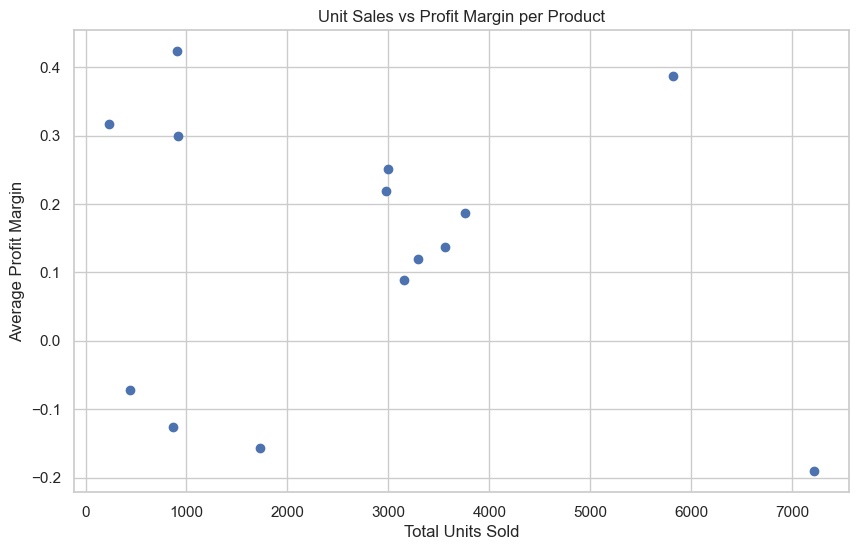

In [64]:
# Aggregate by product name
product_summary = df.groupby('Product').agg({
    'Quantity': 'sum',
    'Profit_Margin': 'mean'
}).reset_index()

# Rename columns for clarity
product_summary.columns = ['Product', 'Total_Units_Sold', 'Average_Profit_Margin']

# 1. Popular products with low or negative profit margin
risky_popular = product_summary[
    (product_summary['Total_Units_Sold'] > 500) & 
    (product_summary['Average_Profit_Margin'] < 0.1)
]
print("Popular products with low or negative profit margin:")
print(risky_popular.sort_values(by='Total_Units_Sold', ascending=False))

# 2. High-margin products with low sales volume
underdogs = product_summary[
    (product_summary['Total_Units_Sold'] < 100) & 
    (product_summary['Average_Profit_Margin'] > 0.5)
]
print("\nHigh-margin products with low sales volume:")
print(underdogs.sort_values(by='Average_Profit_Margin', ascending=False))

# 3. Visualization of sales volume vs profit margin
plt.figure(figsize=(10, 6))
plt.scatter(product_summary['Total_Units_Sold'], product_summary['Average_Profit_Margin'])
plt.xlabel('Total Units Sold')
plt.ylabel('Average Profit Margin')
plt.title('Unit Sales vs Profit Margin per Product')
plt.grid(True)
plt.show()

In [66]:
top_margin_products = product_summary.sort_values(by='Average_Profit_Margin', ascending=False).head(10)
top_margin_products = top_margin_products.reset_index(drop=True)
top_margin_products.index = top_margin_products.index + 1  # Start numbering from 1
print("\nTop 10 Products with the Highest Profit Margins:")
print(top_margin_products)


Top 10 Products with the Highest Profit Margins:
                       Product  Total_Units_Sold  Average_Profit_Margin
1   SaaS Connector Pack - Gold               906               0.423140
2                      Support              5825               0.387410
3                      Alchemy               234               0.317194
4                      Storage               914               0.299171
5               ChatBot Plugin              3000               0.251646
6                 Data Smasher              2976               0.218210
7                   FinanceHub              3756               0.187037
8          SaaS Connector Pack              3563               0.137066
9               Site Analytics              3289               0.119222
10      Marketing Suite - Gold              3158               0.089113
